In [1]:
# Multilinear Regression
import pandas as pd
import numpy as np

# loading the data
cars = pd.read_csv("D:\\upendra\\Data Science Training\\multiple linear regression\\Cars.csv")


In [2]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

cars.describe()





,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

# HP
plt.bar(height = cars.HP, x = np.arange(1, 82, 1))
plt.hist(cars.HP) #histogram
plt.boxplot(cars.HP) #boxplot

# MPG
plt.bar(height = cars.MPG, x = np.arange(1, 82, 1))
plt.hist(cars.MPG) #histogram
plt.boxplot(cars.MPG) #boxplot



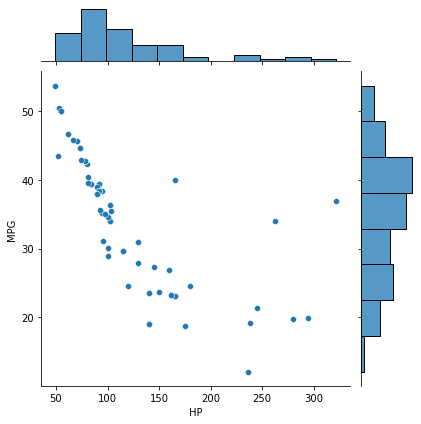

In [5]:
# Jointplot
import seaborn as sns
sns.jointplot(x=cars['HP'], y=cars['MPG'])



C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP', ylabel='count'>

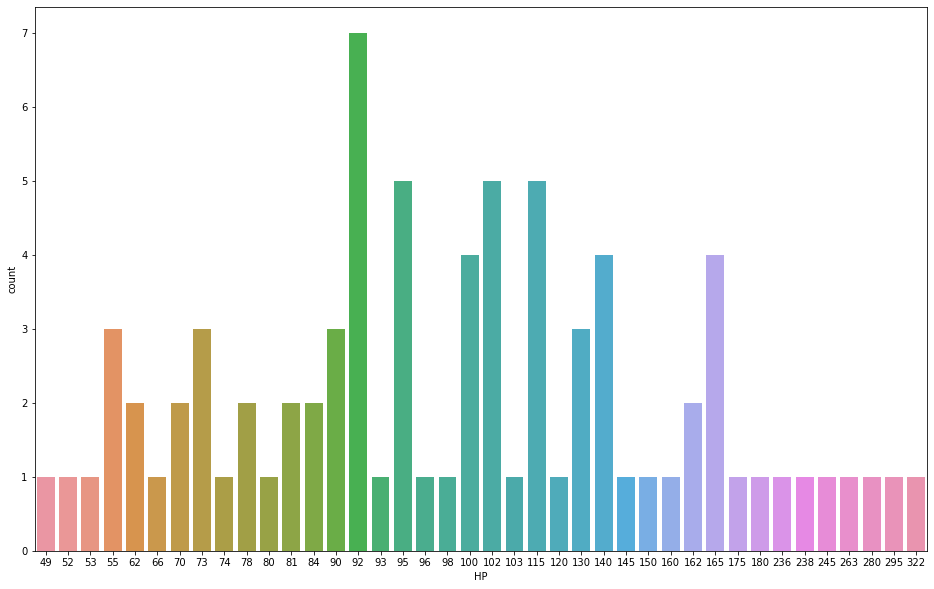

In [6]:
# Countplot
import matplotlib.pyplot  as plt
plt.figure(1, figsize=(16, 10))
sns.countplot(cars['HP'])

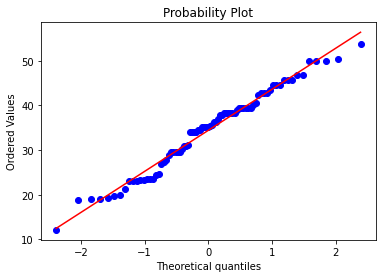

In [7]:
# Q-Q Plot
from scipy import stats
import matplotlib.pyplot as plt
import pylab
stats.probplot(cars.MPG, dist = "norm", plot = pylab)
plt.show()



In [ ]:
help(stats.probplot)

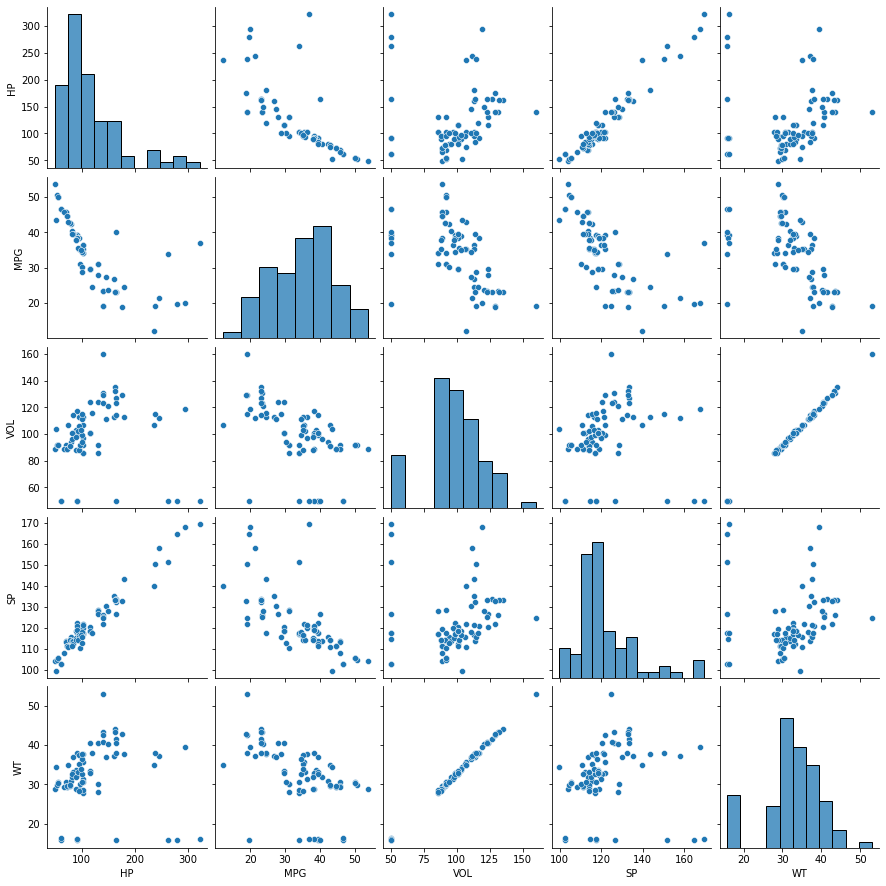

In [8]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars.iloc[:, :])
                             


In [9]:
# Correlation matrix 
cars.corr()



,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
# we see there exists High collinearity between input variables especially between
# [HP & SP], [VOL & WT] so there exists collinearity problem



In [10]:
# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('MPG ~ WT + VOL + SP + HP', data = cars).fit() # regression model

# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.54e-23
Time:                        03:35:23   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

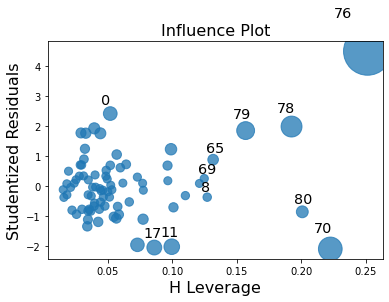

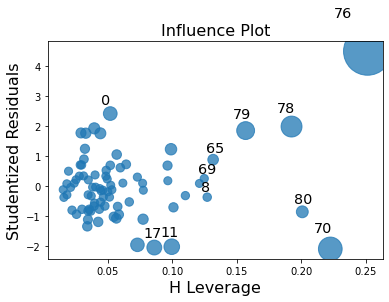

In [11]:
# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row



In [12]:
cars_new = cars.drop(cars.index[[76]])



In [13]:
# Preparing model                  
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP', data = cars_new).fit()    

# Summary
ml_new.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           4.42e-27
Time:                        03:47:16   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
WT             0.0375      1.515      0.025      0.980      -2.980       3.055
VOL           -0.1855      0.509     -0.364      0.717      -1.199       0.828
HP            -0.2266      0.035     -6.413      0.000      -0.297      -0.156
SP             0.4119      0.141      2.913      0.005       0.130       0.694
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data = cars).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data = cars).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('VOL ~ WT + SP + HP', data = cars).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data = cars).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

print('vif_hp',vif_hp,'vif_wt',vif_wt,'vif_vol',vif_vol,'vif_sp',vif_sp)

vif_hp 19.92658897499852 vif_wt 639.5338175572624 vif_vol 638.8060836592878 vif_sp 20.00763878305008


In [15]:
# Storing vif values in a data frame
d1 = {'Variables':['HP', 'WT', 'VOL', 'SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model



,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [16]:
# Final model
final_ml = smf.ols('MPG ~  VOL + SP + HP', data = cars).fit()
final_ml.summary() 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           1.56e-24
Time:                        03:54:18   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Prediction
pred = final_ml.predict(cars)



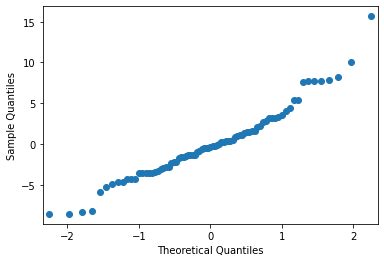

In [18]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()



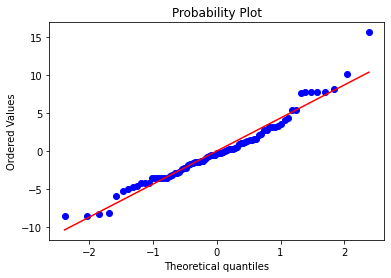

In [19]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()



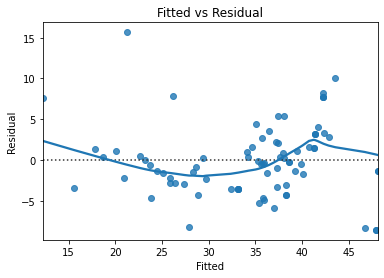

In [20]:
# Residuals vs Fitted plot
sns.residplot(x = pred, y = cars.MPG, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()



In [21]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
cars_train, cars_test = train_test_split(cars, test_size = 0.2) # 20% test data



In [22]:
# preparing the model on train data 
model_train = smf.ols("MPG ~ HP + SP + VOL", data = cars_train).fit()



In [23]:
# prediction on test data set 
test_pred = model_train.predict(cars_test)



In [24]:
# test residual values 
test_resid =cars_test.MPG-test_pred
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse




3.286762590335847

In [25]:
100-3.286762590335847

96.71323740966416

In [26]:

# train_data prediction
train_pred = model_train.predict(cars_train)



In [27]:
# train residual values 
train_resid  = train_pred - cars_train.MPG
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse


4.637913273136115

In [28]:
100-4.637913273136115

95.36208672686388

In [ ]:
95.56